In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sklearn; print(sklearn.__version__)

1.6.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
diversity_school=pd.read_csv(r"/content/drive/MyDrive/tuition/diversity_school.csv") #less important
salary_potential=pd.read_csv("/content/drive/MyDrive/tuition/salary_potential.csv")
tuition_cost=pd.read_csv("/content/drive/MyDrive/tuition/tuition_cost.csv")

salary_potential = salary_potential.drop(columns = ['rank'])
tuition_cost = tuition_cost.drop(columns = ['state_code', 'room_and_board', 'in_state_tuition', 'out_of_state_tuition'])
enrollment = diversity_school.drop(columns = ['category', 'enrollment']).drop_duplicates()
enrollment = enrollment.reset_index()
merged_salary_potential_tuition_cost = pd.merge(salary_potential, tuition_cost, on='name')
merged_salary_potential_tuition_cost = merged_salary_potential_tuition_cost.drop(columns = ['state_name'])
merged_salary_potential_tuition_cost = pd.merge(merged_salary_potential_tuition_cost, enrollment, on='name')
merged_salary_potential_tuition_cost['state'] = merged_salary_potential_tuition_cost['state_x']
merged_salary_potential_tuition_cost = merged_salary_potential_tuition_cost.drop(columns = ['state_x','state_y','index'])

# 計算in_state_total,out_of_state_total哪個比較大
merged_salary_potential_tuition_cost['tution_total'] = merged_salary_potential_tuition_cost[['in_state_total','out_of_state_total']].max(axis=1)

merged_salary_potential_tuition_cost = merged_salary_potential_tuition_cost.drop(columns = ['in_state_total','out_of_state_total'])
merged_salary_potential_tuition_cost = merged_salary_potential_tuition_cost[['name','state','type','degree_length','tution_total','early_career_pay',
 'mid_career_pay','make_world_better_percent','stem_percent', 'total_enrollment']]
merged_salary_potential_tuition_cost.columns

Index(['name', 'state', 'type', 'degree_length', 'tution_total',
       'early_career_pay', 'mid_career_pay', 'make_world_better_percent',
       'stem_percent', 'total_enrollment'],
      dtype='object')

In [6]:
# data = pd.read_csv("/kaggle/input/us-scool/US_school_data.csv")
data = merged_salary_potential_tuition_cost
state_geo = "/kaggle/input/us-scool/us-states.json"
# data = data.drop(columns = ['Unnamed: 0'])
data

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment
0,Auburn University,Alabama,Public,4 Year,43856,54400,104500,51.0,31,25912
1,Tuskegee University,Alabama,Private,4 Year,31820,54500,93500,61.0,30,3103
2,Samford University,Alabama,Private,4 Year,42200,48400,90500,52.0,3,4933
3,Spring Hill College,Alabama,Private,4 Year,52926,46600,89100,53.0,12,1376
4,University of Alabama at Birmingham,Alabama,Public,4 Year,31030,48600,87200,57.0,17,18698
...,...,...,...,...,...,...,...,...,...,...
635,Cardinal Stritch University,Wisconsin,Private,4 Year,38438,47000,82500,51.0,2,3811
636,Wisconsin Lutheran College,Wisconsin,Private,4 Year,39915,46200,82500,45.0,10,1179
637,Viterbo University,Wisconsin,Private,4 Year,37030,46800,81900,62.0,3,2804
638,University of Wisconsin-Parkside,Wisconsin,Public,4 Year,23544,46000,81400,47.0,17,4543


In [7]:
# Check for missing values in the dataset
data.isnull().sum()

,0
name,0
state,0
type,0
degree_length,0
tution_total,0
early_career_pay,0
mid_career_pay,0
make_world_better_percent,17
stem_percent,0
total_enrollment,0


In [8]:
# Fill null values with the median for each state and year
data['make_world_better_percent'] = data['make_world_better_percent'].transform(lambda x: x.fillna(x.median()))

data.isna().sum()

,0
name,0
state,0
type,0
degree_length,0
tution_total,0
early_career_pay,0
mid_career_pay,0
make_world_better_percent,0
stem_percent,0
total_enrollment,0


In [9]:
data['ROI'] = (data['early_career_pay'] - data['tution_total']) / data['tution_total'] * 100
data

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment,ROI
0,Auburn University,Alabama,Public,4 Year,43856,54400,104500,51.0,31,25912,24.042320
1,Tuskegee University,Alabama,Private,4 Year,31820,54500,93500,61.0,30,3103,71.275927
2,Samford University,Alabama,Private,4 Year,42200,48400,90500,52.0,3,4933,14.691943
3,Spring Hill College,Alabama,Private,4 Year,52926,46600,89100,53.0,12,1376,-11.952538
4,University of Alabama at Birmingham,Alabama,Public,4 Year,31030,48600,87200,57.0,17,18698,56.622623
...,...,...,...,...,...,...,...,...,...,...,...
635,Cardinal Stritch University,Wisconsin,Private,4 Year,38438,47000,82500,51.0,2,3811,22.274832
636,Wisconsin Lutheran College,Wisconsin,Private,4 Year,39915,46200,82500,45.0,10,1179,15.745960
637,Viterbo University,Wisconsin,Private,4 Year,37030,46800,81900,62.0,3,2804,26.384013
638,University of Wisconsin-Parkside,Wisconsin,Public,4 Year,23544,46000,81400,47.0,17,4543,95.378865


In [10]:
data['Mid_ROI'] = (data['mid_career_pay'] - data['tution_total']) / data['tution_total'] * 100
data

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment,ROI,Mid_ROI
0,Auburn University,Alabama,Public,4 Year,43856,54400,104500,51.0,31,25912,24.042320,138.279825
1,Tuskegee University,Alabama,Private,4 Year,31820,54500,93500,61.0,30,3103,71.275927,193.840352
2,Samford University,Alabama,Private,4 Year,42200,48400,90500,52.0,3,4933,14.691943,114.454976
3,Spring Hill College,Alabama,Private,4 Year,52926,46600,89100,53.0,12,1376,-11.952538,68.348260
4,University of Alabama at Birmingham,Alabama,Public,4 Year,31030,48600,87200,57.0,17,18698,56.622623,181.018369
...,...,...,...,...,...,...,...,...,...,...,...,...
635,Cardinal Stritch University,Wisconsin,Private,4 Year,38438,47000,82500,51.0,2,3811,22.274832,114.631354
636,Wisconsin Lutheran College,Wisconsin,Private,4 Year,39915,46200,82500,45.0,10,1179,15.745960,106.689215
637,Viterbo University,Wisconsin,Private,4 Year,37030,46800,81900,62.0,3,2804,26.384013,121.172023
638,University of Wisconsin-Parkside,Wisconsin,Public,4 Year,23544,46000,81400,47.0,17,4543,95.378865,245.735644


Our terget column is ROI and Mid ROI







## Exploratory Data Analysis

<Axes: xlabel='Mid_ROI', ylabel='Density'>

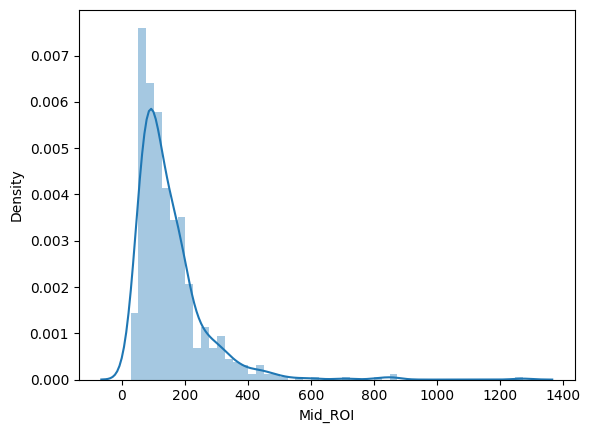

In [11]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['Mid_ROI'])

<Axes: xlabel='ROI', ylabel='Density'>

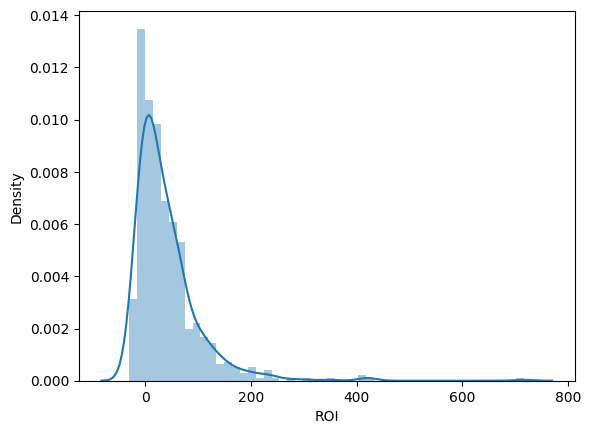

In [12]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(data['ROI'])

Text(0.5, 1.0, 'type of universities')

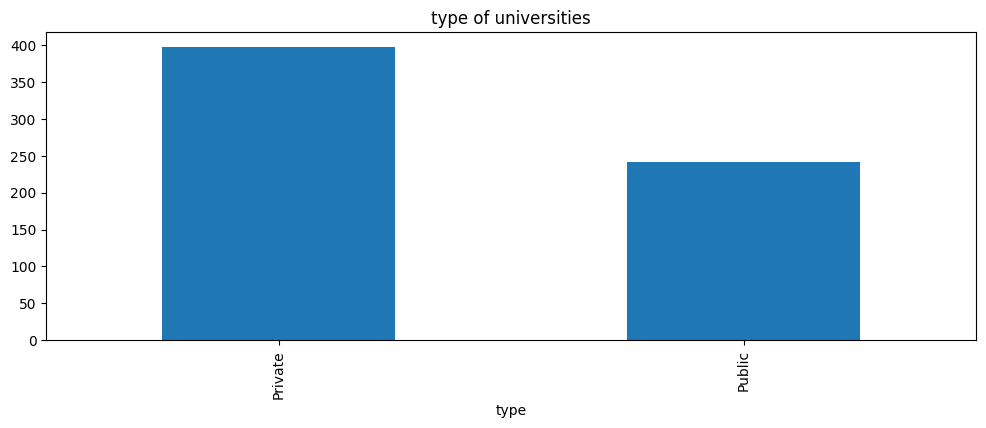

In [13]:
plt.figure(figsize=(12,4))
data['type'].value_counts().plot(kind='bar')
plt.title('type of universities')

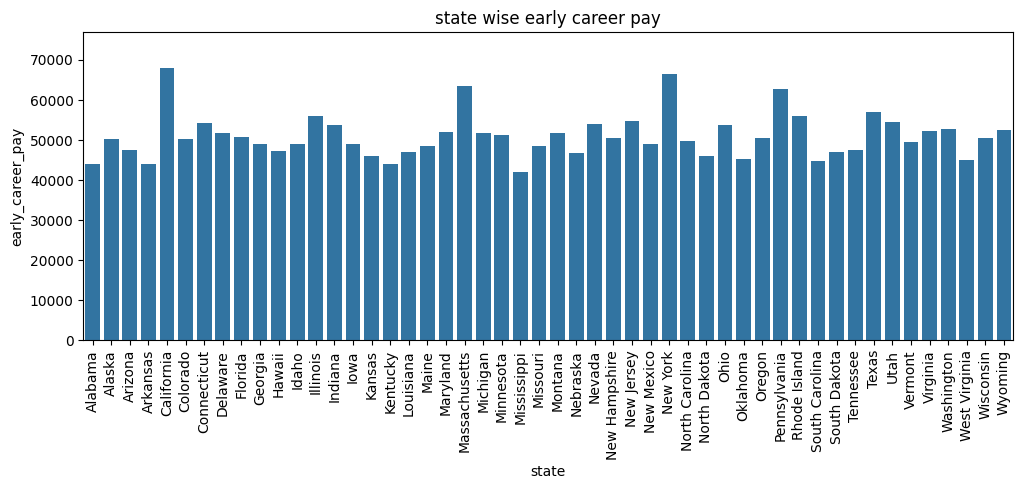

In [14]:
plt.figure(figsize=(12,4))
sns.barplot(x=data['state'],y=data['early_career_pay'],errwidth=0)
plt.title('state wise early career pay')
plt.xticks(rotation='vertical')
plt.show()

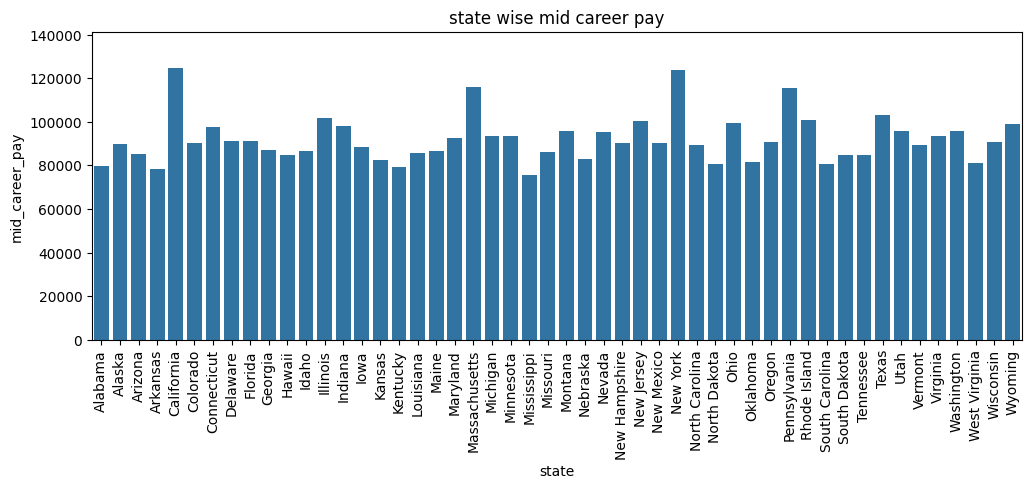

In [15]:
plt.figure(figsize=(12,4))
sns.barplot(x=data['state'],y=data['mid_career_pay'],errwidth=0)
plt.title('state wise mid career pay')
plt.xticks(rotation='vertical')
plt.show()

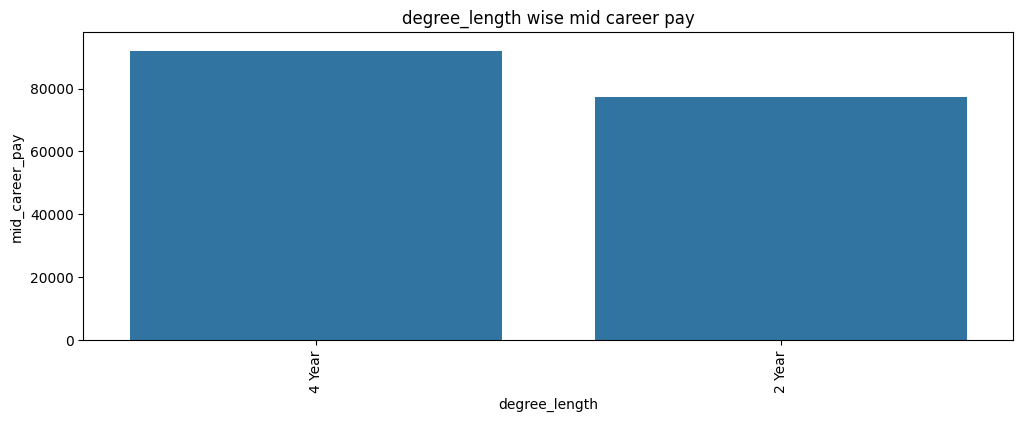

In [16]:
plt.figure(figsize=(12,4))
sns.barplot(x=data['degree_length'],y=data['mid_career_pay'],errwidth=0)
plt.title('degree_length wise mid career pay')
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='type', ylabel='ROI'>

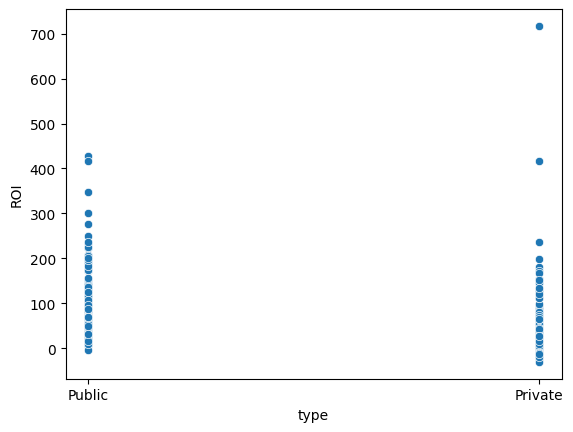

In [17]:
sns.scatterplot(x=data['type'],y=data['ROI'])

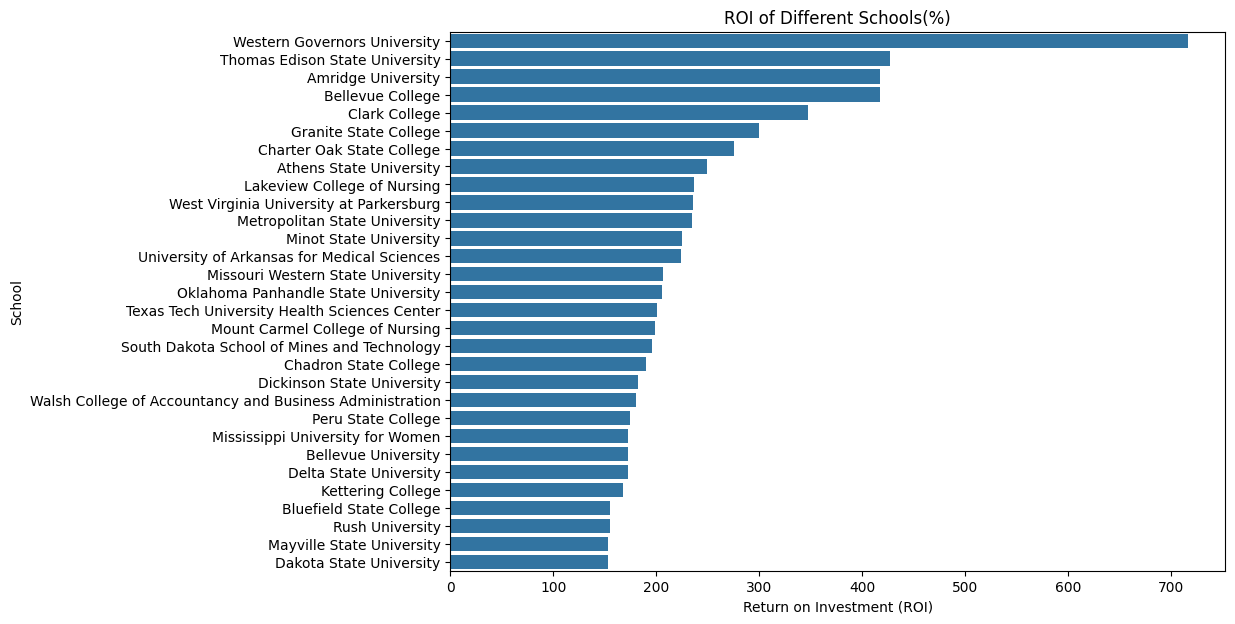

In [18]:
plt.figure(figsize=(10, 7))
sns.barplot(x='ROI', y='name', data=data.sort_values(by='ROI', ascending=False)[:30])
plt.title('ROI of Different Schools(%)')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('School')
plt.show()

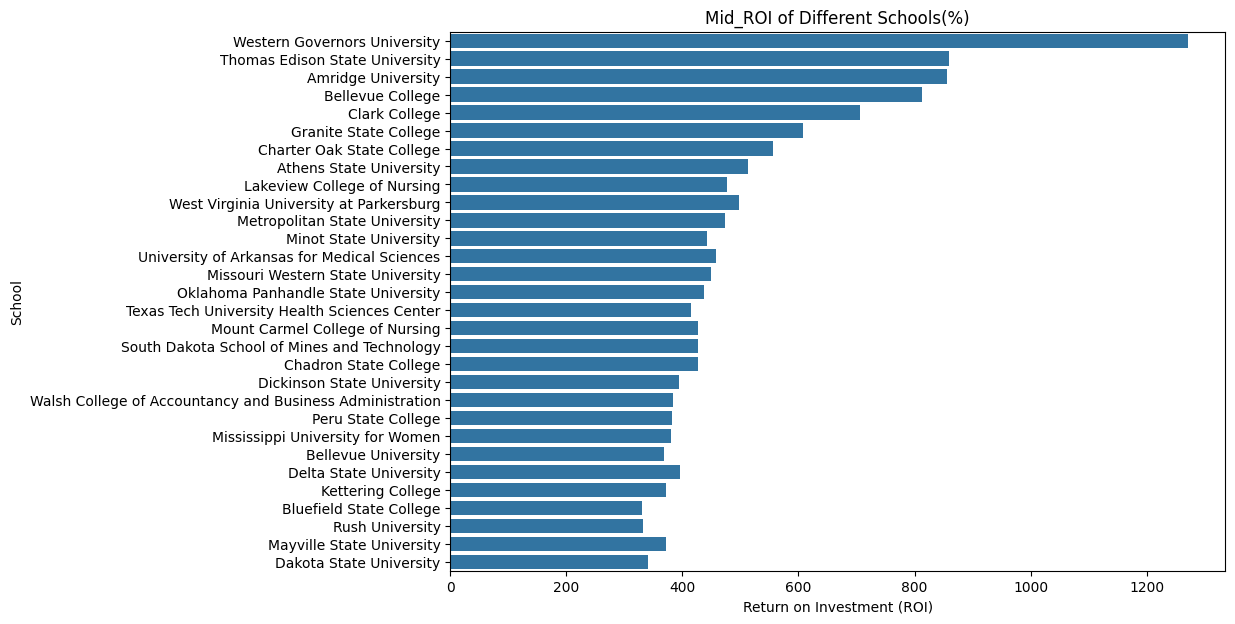

In [19]:
plt.figure(figsize=(10, 7))
sns.barplot(x='Mid_ROI', y='name', data=data.sort_values(by='ROI', ascending=False)[:30])
plt.title('Mid_ROI of Different Schools(%)')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('School')
plt.show()

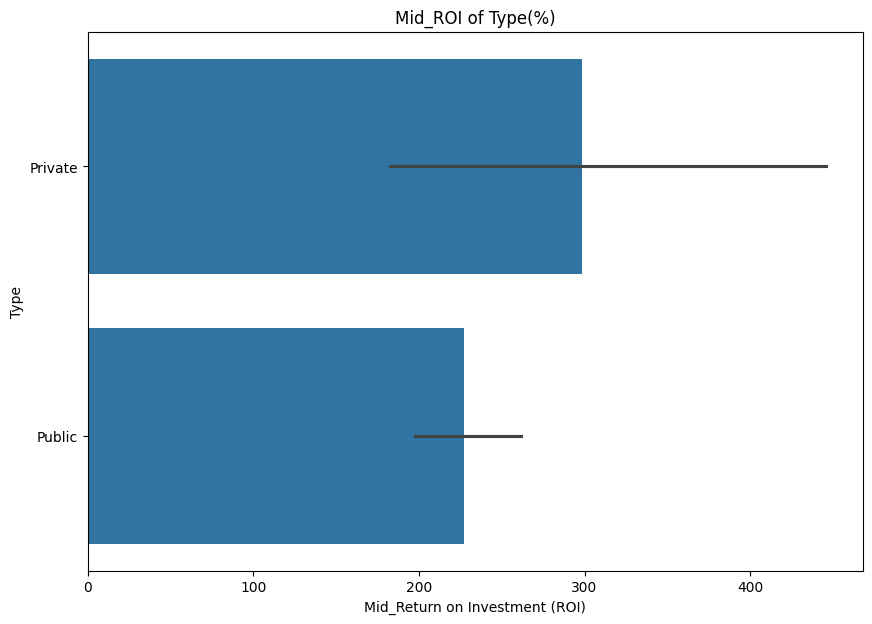

In [20]:
plt.figure(figsize=(10, 7))
sns.barplot(x='ROI', y='type', data=data.sort_values(by='Mid_ROI', ascending=False)[:30])
plt.title('Mid_ROI of Type(%)')
plt.xlabel('Mid_Return on Investment (ROI)')
plt.ylabel('Type')
plt.show()

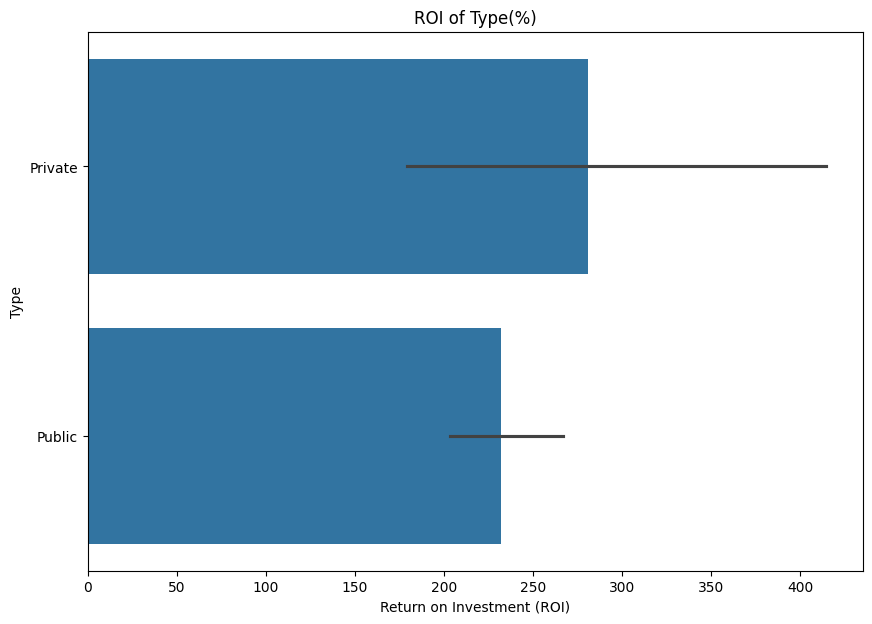

In [21]:
plt.figure(figsize=(10, 7))
sns.barplot(x='ROI', y='type', data=data.sort_values(by='ROI', ascending=False)[:30])
plt.title('ROI of Type(%)')
plt.xlabel('Return on Investment (ROI)')
plt.ylabel('Type')
plt.show()

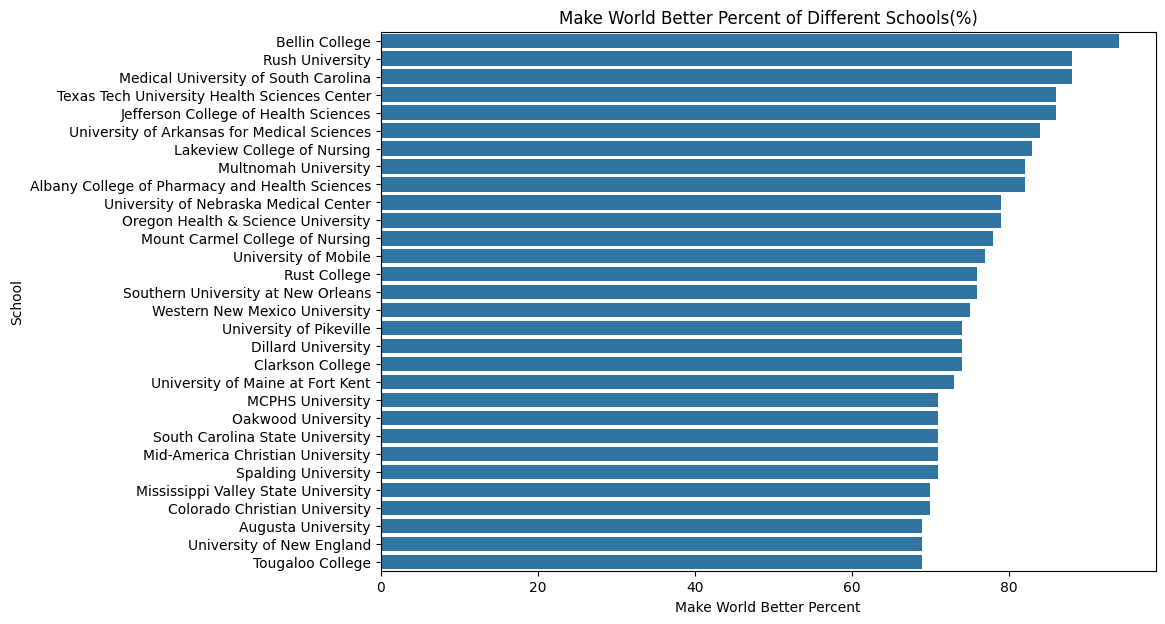

In [22]:
plt.figure(figsize=(10, 7))
sns.barplot(x='make_world_better_percent', y='name', data=data.sort_values(by='make_world_better_percent', ascending=False)[:30])
plt.title('Make World Better Percent of Different Schools(%)')
plt.xlabel('Make World Better Percent')
plt.ylabel('School')
plt.show()

In [23]:
state_summary = data.groupby('state').agg({
    'total_enrollment': 'sum',
    'tution_total': 'mean',
    'early_career_pay': 'mean',
    'mid_career_pay': 'mean',
    'make_world_better_percent': 'mean',
    'ROI': 'mean',
    'Mid_ROI': 'mean'
}).reset_index()

In [24]:
state_summary

,state,total_enrollment,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,ROI,Mid_ROI
0,Alabama,135572,29769.850000,43965.000000,79955.000000,59.450000,73.112310,214.027762
1,Alaska,579,28130.000000,50300.000000,90000.000000,67.000000,78.812656,219.943121
2,Arizona,71526,40425.250000,47375.000000,85275.000000,57.000000,17.707707,111.908112
3,Arkansas,62721,28125.266667,43833.333333,78333.333333,57.400000,73.062488,208.385643
4,California,140590,63885.923077,67800.000000,124876.923077,49.769231,9.049287,100.774740
5,Colorado,66290,40559.454545,50300.000000,90154.545455,54.636364,37.281752,145.157884
6,Connecticut,121680,48560.500000,54287.500000,97700.000000,51.000000,28.222136,128.795457
7,Delaware,29089,35655.333333,51566.666667,91400.000000,49.000000,48.526854,162.666954
8,Florida,317422,44773.666667,50586.666667,91300.000000,52.400000,21.025195,118.628612
9,Georgia,219277,40885.600000,48850.000000,87305.000000,52.300000,24.931552,123.503370


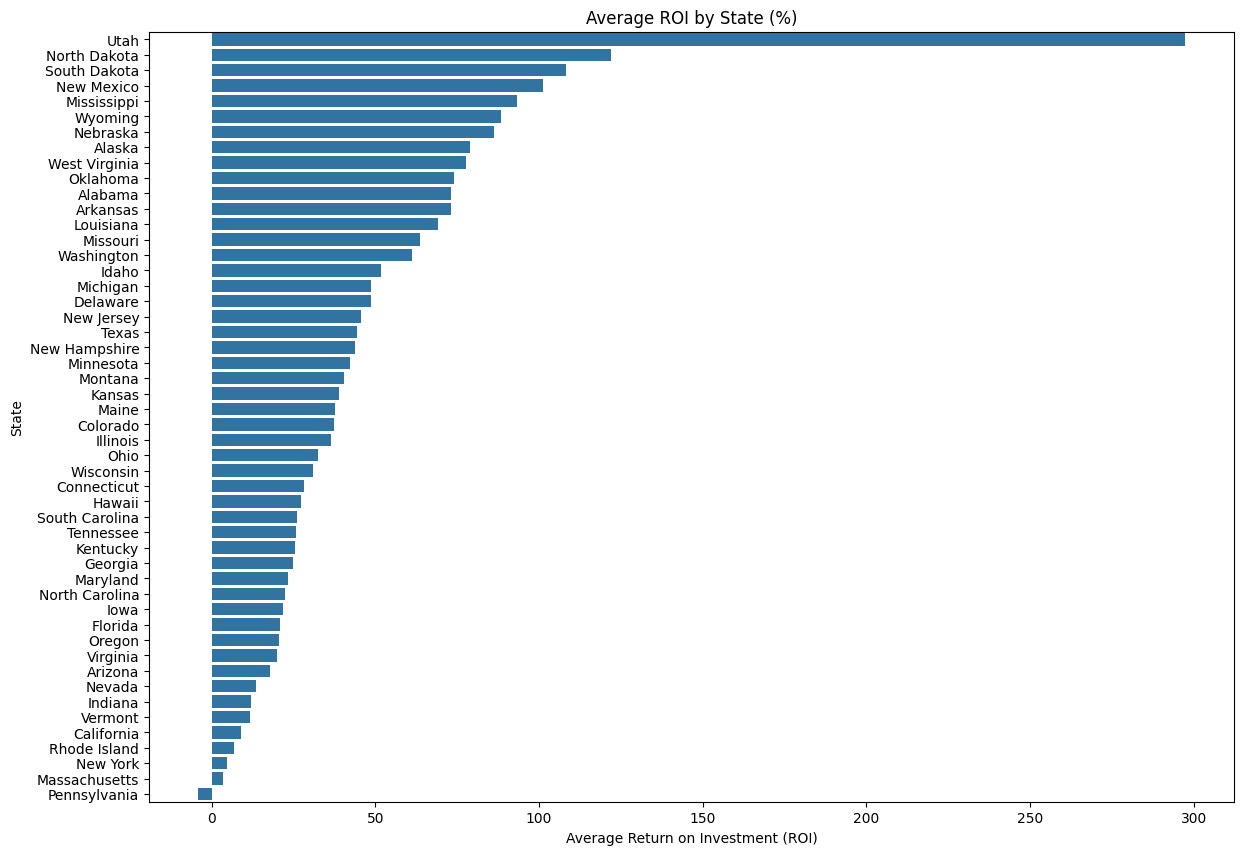

In [25]:
plt.figure(figsize=(14, 10))
sns.barplot(x='ROI', y='state', data=state_summary.sort_values(by='ROI', ascending=False))
plt.title('Average ROI by State (%)')
plt.xlabel('Average Return on Investment (ROI)')
plt.ylabel('State')
plt.show()

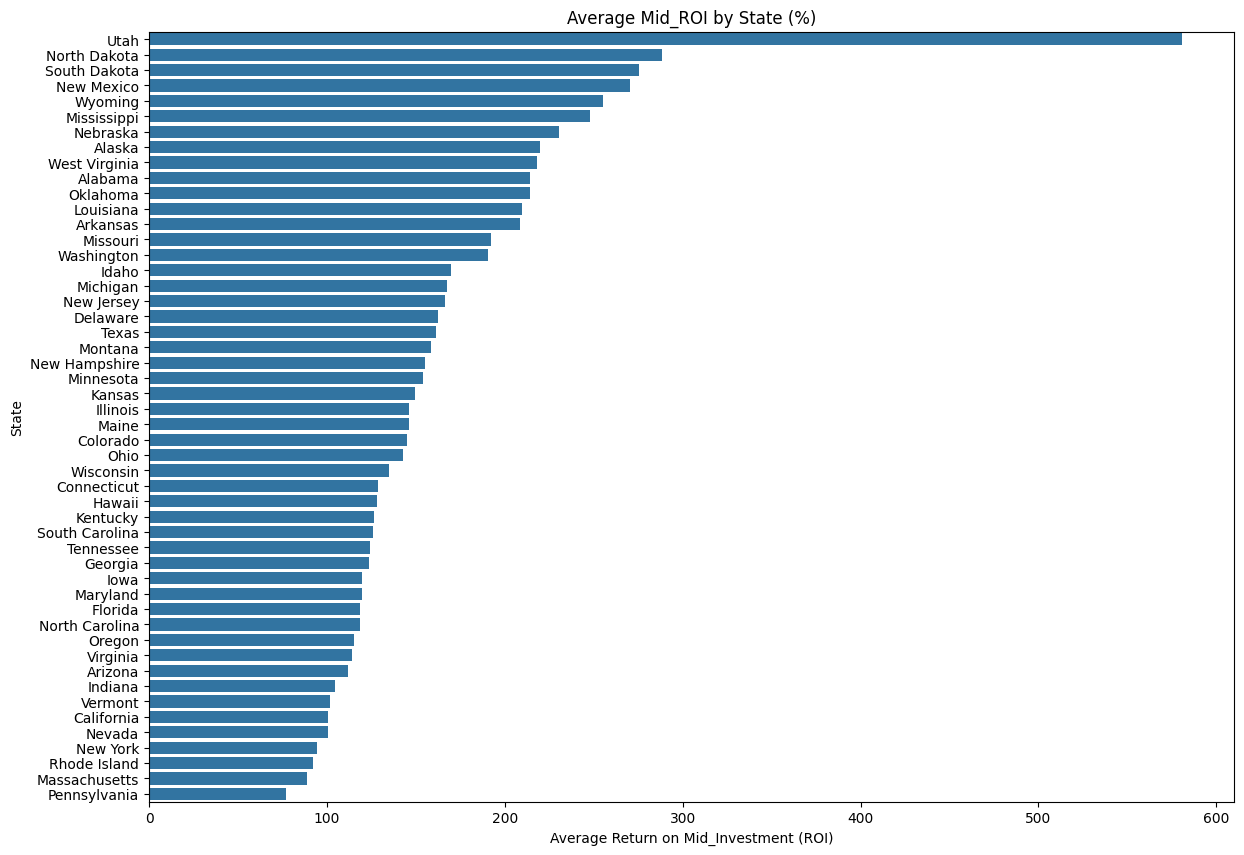

In [26]:
plt.figure(figsize=(14, 10))
sns.barplot(x='Mid_ROI', y='state', data=state_summary.sort_values(by='Mid_ROI', ascending=False))
plt.title('Average Mid_ROI by State (%)')
plt.xlabel('Average Return on Mid_Investment (ROI)')
plt.ylabel('State')
plt.show()

<Axes: title={'center': 'Mid_ROI in Five Top States (%)'}, xlabel='state', ylabel='ROI'>

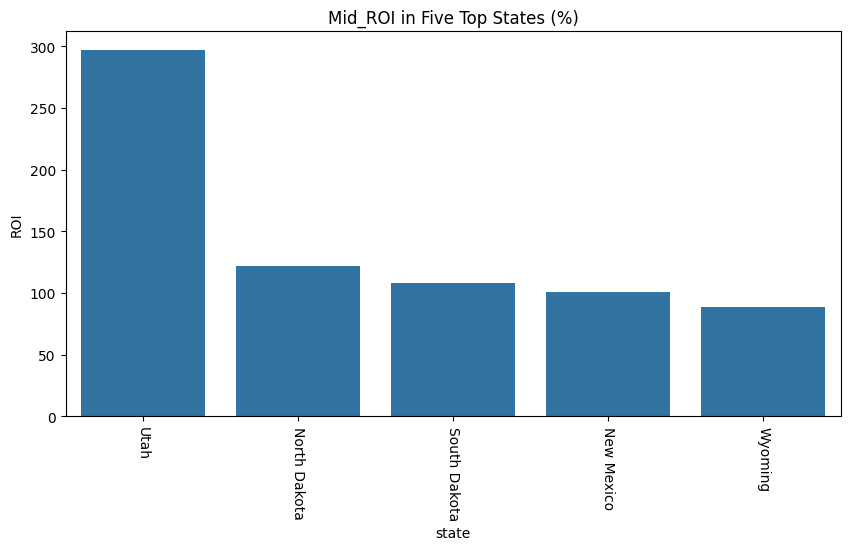

In [27]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = -90)
state_top = state_summary.sort_values(by='Mid_ROI', ascending=False)
state_top = state_top[:5]
plt.title('Mid_ROI in Five Top States (%)')
sns.barplot(data=state_top, x=state_top['state'], y="ROI")

In [28]:
state = np.unique(state_top['state'])
school_compare = data[data['state'].isin(state)]
school_compare = school_compare.reset_index(drop=True)
school_compare['Cost_effectiveness'] = school_compare['early_career_pay'] / school_compare['tution_total']
school_compare

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment,ROI,Mid_ROI,Cost_effectiveness
0,New Mexico Institute of Mining and Technology,New Mexico,Public,4 Year,30778,64700,120400,61.0,91,2127,110.215089,291.188511,2.102151
1,Western New Mexico University,New Mexico,Public,4 Year,24367,41700,76700,75.0,4,3557,71.133090,214.769976,1.711331
2,New Mexico Highlands University,New Mexico,Public,4 Year,18174,40400,73800,63.0,4,3546,122.295587,306.074612,2.222956
3,University of North Dakota,North Dakota,Public,4 Year,29733,53800,96000,54.0,16,14906,80.943733,222.873575,1.809437
4,University of Jamestown,North Dakota,Private,4 Year,29546,47600,85400,64.0,11,970,61.104718,189.040818,1.611047
5,Mayville State University,North Dakota,Public,4 Year,17239,43700,81300,44.0,10,1081,153.494982,371.605082,2.534950
6,Dickinson State University,North Dakota,Public,4 Year,16442,46400,81200,55.0,8,1479,182.204111,393.857195,2.822041
7,University of Mary,North Dakota,Private,4 Year,25610,46400,79100,64.0,3,2809,81.179227,208.863725,1.811792
8,Minot State University,North Dakota,Public,4 Year,13674,44500,74100,55.0,7,3410,225.435132,441.904344,3.254351
9,Valley City State University,North Dakota,Public,4 Year,23612,39900,68600,56.0,3,1378,68.981874,190.530239,1.689819


In [29]:
state = np.unique(state_top['state'])
mid_school_compare = data[data['state'].isin(state)]
mid_school_compare = school_compare.reset_index(drop=True)
mid_school_compare['Cost_effectiveness'] = school_compare['mid_career_pay'] / school_compare['tution_total']
mid_school_compare

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment,ROI,Mid_ROI,Cost_effectiveness
0,New Mexico Institute of Mining and Technology,New Mexico,Public,4 Year,30778,64700,120400,61.0,91,2127,110.215089,291.188511,3.911885
1,Western New Mexico University,New Mexico,Public,4 Year,24367,41700,76700,75.0,4,3557,71.133090,214.769976,3.147700
2,New Mexico Highlands University,New Mexico,Public,4 Year,18174,40400,73800,63.0,4,3546,122.295587,306.074612,4.060746
3,University of North Dakota,North Dakota,Public,4 Year,29733,53800,96000,54.0,16,14906,80.943733,222.873575,3.228736
4,University of Jamestown,North Dakota,Private,4 Year,29546,47600,85400,64.0,11,970,61.104718,189.040818,2.890408
5,Mayville State University,North Dakota,Public,4 Year,17239,43700,81300,44.0,10,1081,153.494982,371.605082,4.716051
6,Dickinson State University,North Dakota,Public,4 Year,16442,46400,81200,55.0,8,1479,182.204111,393.857195,4.938572
7,University of Mary,North Dakota,Private,4 Year,25610,46400,79100,64.0,3,2809,81.179227,208.863725,3.088637
8,Minot State University,North Dakota,Public,4 Year,13674,44500,74100,55.0,7,3410,225.435132,441.904344,5.419043
9,Valley City State University,North Dakota,Public,4 Year,23612,39900,68600,56.0,3,1378,68.981874,190.530239,2.905302


In [30]:
state = np.unique(state_top['state'])
school_compare = data[data['state'].isin(state)]
school_compare = school_compare.reset_index(drop=True)
school_compare['Cost_effectiveness'] = school_compare['early_career_pay'] / school_compare['tution_total']
school_compare

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment,ROI,Mid_ROI,Cost_effectiveness
0,New Mexico Institute of Mining and Technology,New Mexico,Public,4 Year,30778,64700,120400,61.0,91,2127,110.215089,291.188511,2.102151
1,Western New Mexico University,New Mexico,Public,4 Year,24367,41700,76700,75.0,4,3557,71.133090,214.769976,1.711331
2,New Mexico Highlands University,New Mexico,Public,4 Year,18174,40400,73800,63.0,4,3546,122.295587,306.074612,2.222956
3,University of North Dakota,North Dakota,Public,4 Year,29733,53800,96000,54.0,16,14906,80.943733,222.873575,1.809437
4,University of Jamestown,North Dakota,Private,4 Year,29546,47600,85400,64.0,11,970,61.104718,189.040818,1.611047
5,Mayville State University,North Dakota,Public,4 Year,17239,43700,81300,44.0,10,1081,153.494982,371.605082,2.534950
6,Dickinson State University,North Dakota,Public,4 Year,16442,46400,81200,55.0,8,1479,182.204111,393.857195,2.822041
7,University of Mary,North Dakota,Private,4 Year,25610,46400,79100,64.0,3,2809,81.179227,208.863725,1.811792
8,Minot State University,North Dakota,Public,4 Year,13674,44500,74100,55.0,7,3410,225.435132,441.904344,3.254351
9,Valley City State University,North Dakota,Public,4 Year,23612,39900,68600,56.0,3,1378,68.981874,190.530239,1.689819


Text(0.5, 1.0, 'ROI of Different Schools in Five Top States (%)')

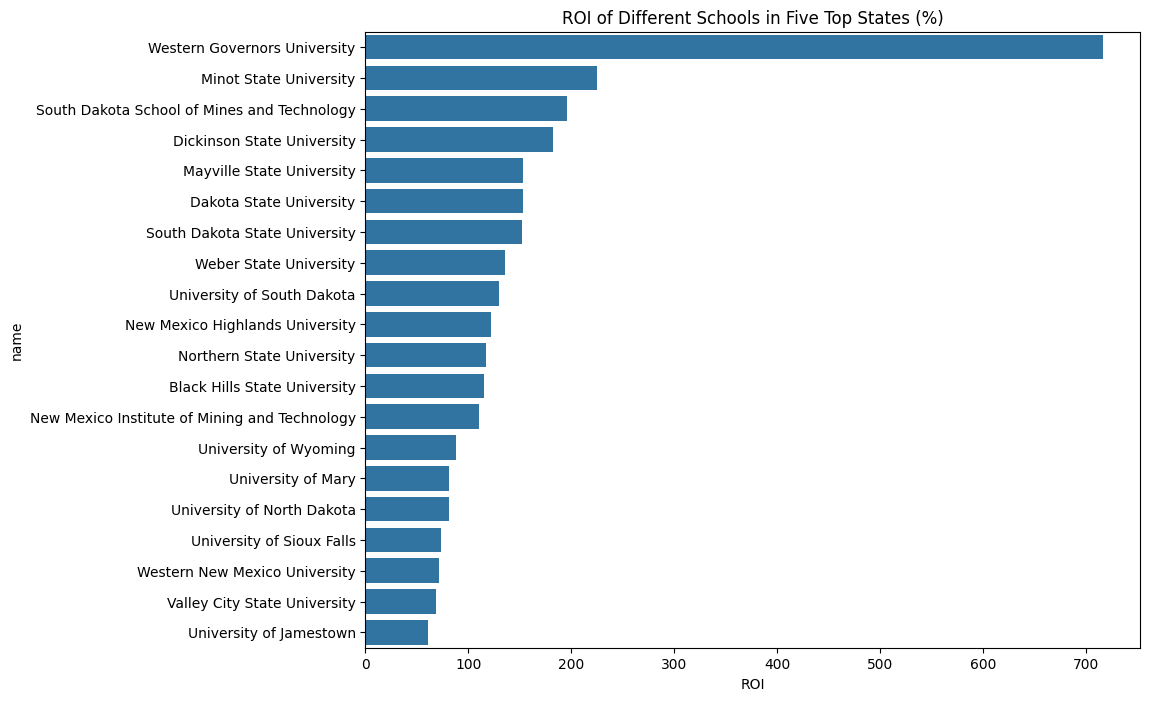

In [31]:
plt.figure(figsize=(10,8))
school_compare = school_compare.sort_values(by='ROI', ascending=False)[:20]
sns.barplot(data=school_compare, x='ROI', y="name")
plt.title('ROI of Different Schools in Five Top States (%)')

Text(0.5, 1.0, 'Mid_ROI of Different Schools in Five Top States (%)')

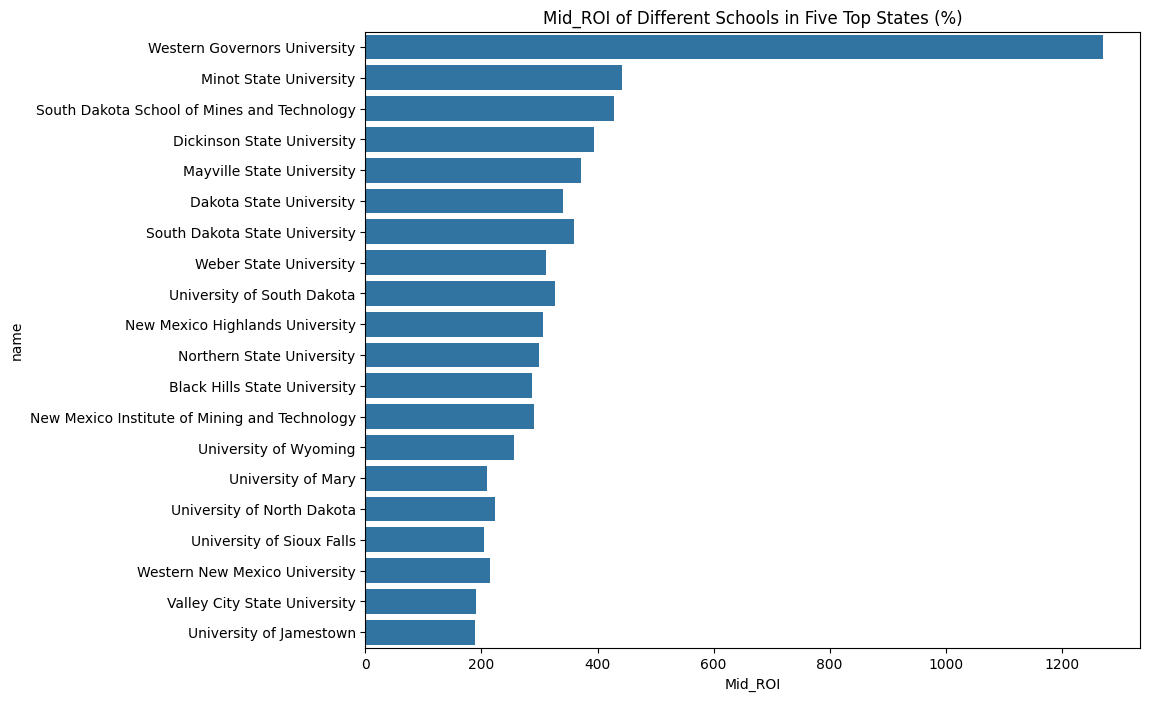

In [32]:
plt.figure(figsize=(10,8))
mid_school_compare = mid_school_compare.sort_values(by='Mid_ROI', ascending=False)[:20]
sns.barplot(data=school_compare, x='Mid_ROI', y="name")
plt.title('Mid_ROI of Different Schools in Five Top States (%)')

In [33]:
data.nunique()

,0
name,640
state,50
type,2
degree_length,2
tution_total,635
early_career_pay,269
mid_career_pay,366
make_world_better_percent,51
stem_percent,70
total_enrollment,625


In [34]:
categoricals =['name','state','type','degree_length']
numerics     =['tution_total','make_world_better_percent','stem_percent','total_enrollment'] # instead of typing the name of all these variables, can you think of an easier way to do this?


In [35]:
#separate 2 datasets

categoricals = pd.get_dummies(categoricals, columns=['name','state','type','degree_length'])#, prefix = ['type'])
categoricals

,degree_length,name,state,type
0,False,True,False,False
1,False,False,True,False
2,False,False,False,True
3,True,False,False,False


In [36]:
for col in categoricals:
    data[col]=data[col].astype("category")

In [37]:
! pip install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=3afb35a4711ee9cbf6b05b5f88676caea29592f2b6bb970a75c178a767ae5d14
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


In [38]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [39]:
!pip install pandas # Ensure pandas is installed if it isn't already.
# Import the necessary modules
import pandas as pd
from pandas.api.types import is_numeric_dtype # Import is_numeric_dtype

In [40]:
for col in data.columns:
    if is_numeric_dtype(data[col]):
        continue
    else:
        data[col]=le.fit_transform(data[col])
data.head()

,name,state,type,degree_length,tution_total,early_career_pay,mid_career_pay,make_world_better_percent,stem_percent,total_enrollment,ROI,Mid_ROI
0,18,0,1,1,43856,54400,104500,51.0,31,25912,24.042320,138.279825
1,482,0,0,1,31820,54500,93500,61.0,30,3103,71.275927,193.840352
2,423,0,0,1,42200,48400,90500,52.0,3,4933,14.691943,114.454976
3,453,0,0,1,52926,46600,89100,53.0,12,1376,-11.952538,68.348260
4,483,0,1,1,31030,48600,87200,57.0,17,18698,56.622623,181.018369


In [41]:
# Declare feature vector and target variable
x = data[['name','state','type','tution_total','make_world_better_percent','stem_percent','total_enrollment','degree_length']]
y = data['mid_career_pay']

# Accuracy without feature engineering

In [42]:
#x=data.drop('mid_career_pay',axis=1)
#x.shape
#x.shape

In [43]:
x.shape

(640, 8)

In [44]:
len(y)

640

In [45]:
#y=np.log(data[['mid_career_pay']])
#len(y)

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75,random_state=42)

# Dataframe function

In [48]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [49]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

lr = LinearRegression()
R = Ridge(alpha=98.98802100817524)
las = Lasso(alpha=0.10073967073582177)
neigh = KNeighborsRegressor(n_neighbors=20)
dtr = DecisionTreeRegressor(max_depth=2)
svr = SVR(C=0.10476315743580568, epsilon=0.553772390412931)
rfr = RandomForestRegressor(max_depth=5, n_estimators=298)
xtr = ExtraTreesRegressor()
ada = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
gbr = GradientBoostingRegressor(learning_rate=0.2991268081356443, max_depth=8,
                            min_samples_leaf=8, min_samples_split=10,
                            n_estimators=77, subsample=0.5064897441943326)
xgbr= XGBRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.25656194205737165,
               max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=np.nan,  # Explicitly handle missing values
               monotone_constraints=None,
               multi_strategy=None, n_estimators=88, n_jobs=None,
               num_parallel_tree=None, random_state=None) #added missing=np.nan to handle missing value


In [50]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

def model(xtrain, ytrain, xtest, ytest):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNeighborsRegressor": KNeighborsRegressor(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "SVR": SVR(),
        "RandomForestRegressor": RandomForestRegressor(),
        "ExtraTreesRegressor": ExtraTreesRegressor(),
        "AdaBoostRegressor": AdaBoostRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "XGBRegressor": XGBRegressor()
    }

    train_mape = []
    test_mape = []

    for name, model in models.items():
        model.fit(xtrain, ytrain)
        train_pred = model.predict(xtrain)
        test_pred = model.predict(xtest)

        train_mape.append(mean_absolute_percentage_error(ytrain, train_pred))
        test_mape.append(mean_absolute_percentage_error(ytest, test_pred))

    return list(models.keys()), train_mape, test_mape

In [51]:
def dataframe(train_mape, test_mape):
    vis = {
        'Algorithm': [
            'LinearRegression', 'Ridge', 'Lasso', 'KNeighborsRegressor', 'DecisionTreeRegressor',
            'SVR', 'RandomForestRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor',
            'XGBRegressor'
        ],
        'Train_MAPE (%)': train_mape,
        'Test_MAPE (%)': test_mape
    }

    mape_df = pd.DataFrame(vis)
    return mape_df

In [52]:
model_name, train_mape, test_mape = model(xtrain, ytrain, xtest, ytest)

In [53]:
data = dataframe(train_mape, test_mape)
data

,Algorithm,Train_MAPE (%),Test_MAPE (%)
0,LinearRegression,0.071288,0.076793
1,Ridge,0.071301,0.076803
2,Lasso,0.071289,0.076794
3,KNeighborsRegressor,0.070175,0.092640
4,DecisionTreeRegressor,0.000000,0.083164
5,SVR,0.120320,0.132166
6,RandomForestRegressor,0.023528,0.064861
7,ExtraTreesRegressor,0.000000,0.064320
8,AdaBoostRegressor,0.065762,0.074997
9,GradientBoostingRegressor,0.037797,0.064086


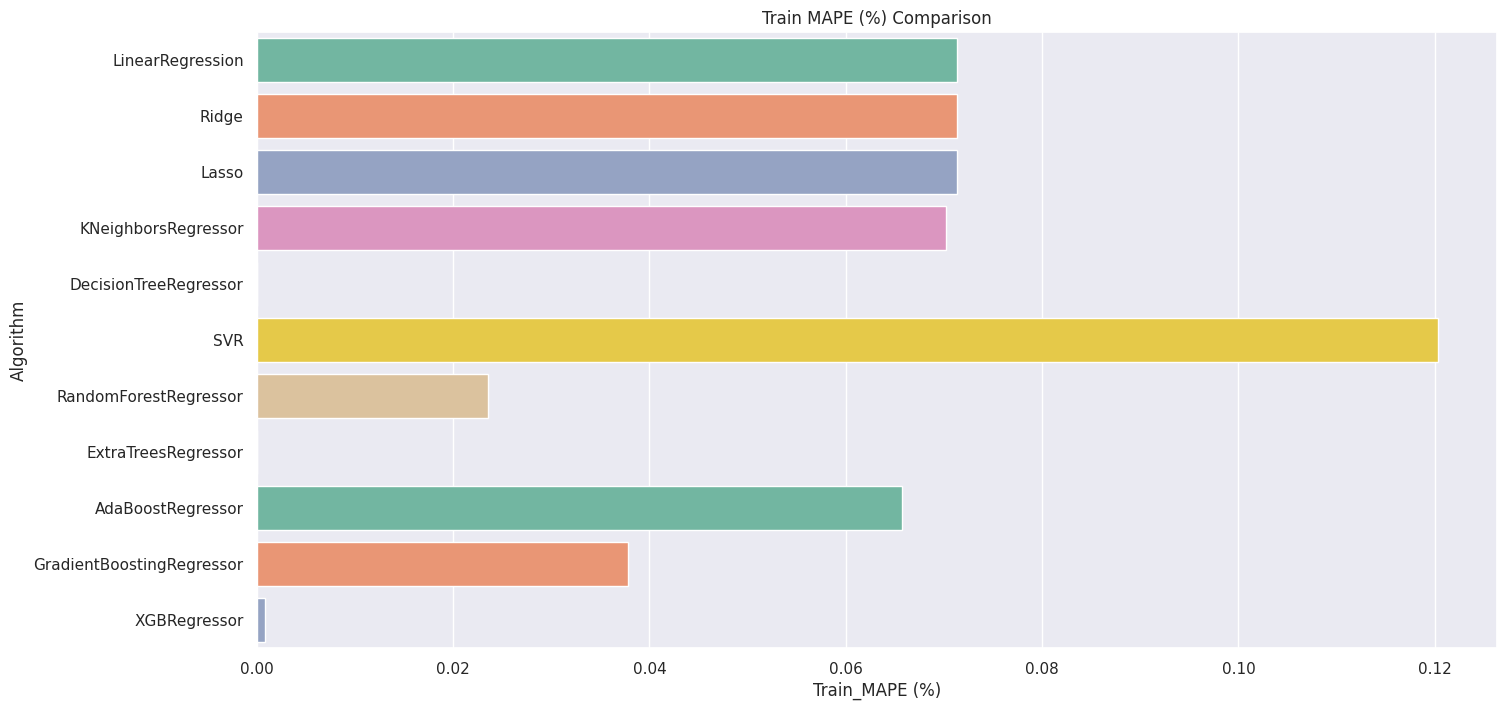

In [54]:
plt.figure(figsize=(16, 8))
sns.set()
plt.title("Train MAPE (%) Comparison")  # Update title to reflect MAPE
sns.barplot(y="Algorithm", x="Train_MAPE (%)", data=data, palette="Set2")
sns.set(rc={"figure.figsize": (15, 5)})
plt.show()

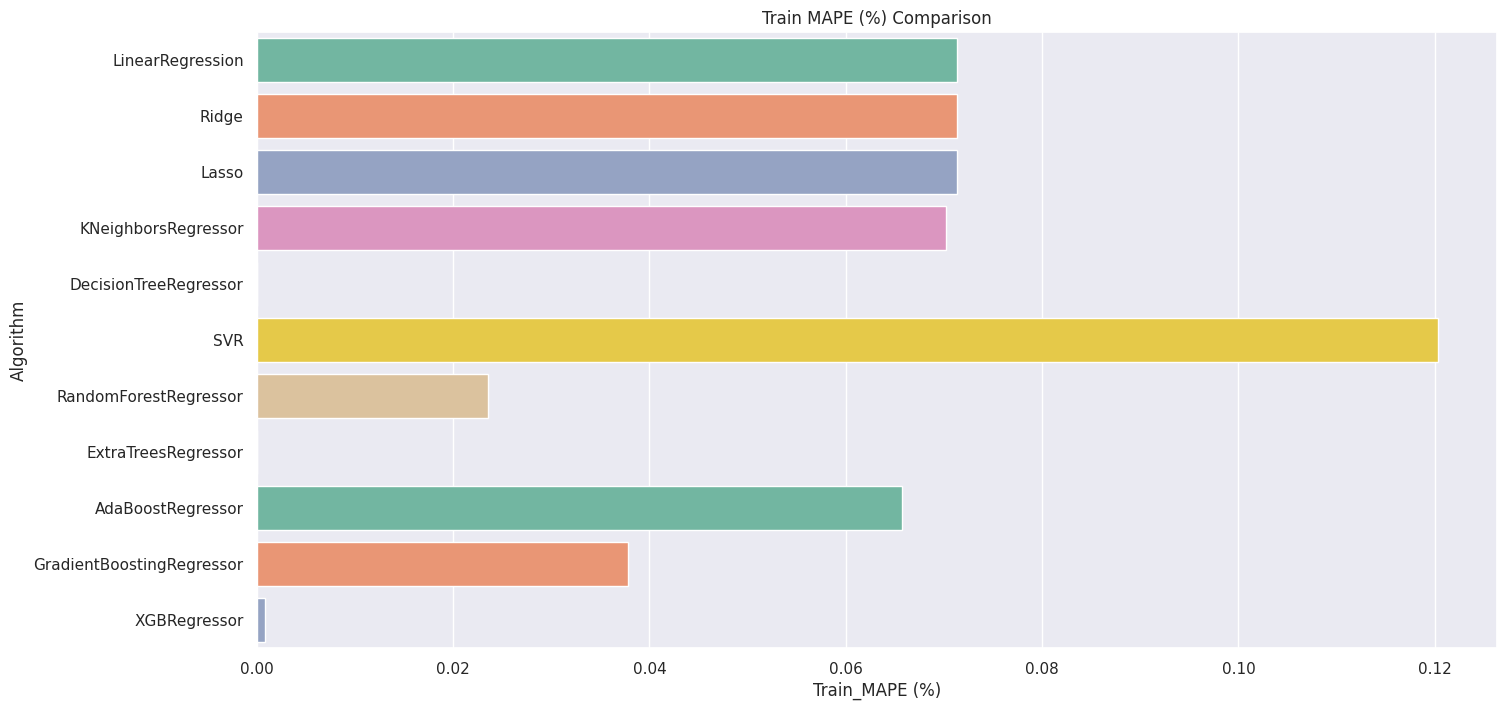

In [55]:

# Set figure size and style
plt.figure(figsize=(16, 8))
sns.set()

# Create the bar plot for Train MAPE (%)
plt.title("Train MAPE (%) Comparison")  # Update title to reflect MAPE
sns.barplot(y="Algorithm", x="Train_MAPE (%)", data=data, palette="Set2")

# Set figure size for better visibility
sns.set(rc={"figure.figsize": (15, 5)})

# Show the plot
plt.show()

# Accuracy with feature engineering

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [57]:
scaler1= MinMaxScaler()
MinMax_scaled_x= scaler1.fit_transform(x)
MinMax_scaled_x

array([[0.02816901, 0.        , 1.        , ..., 0.31      , 0.42556488,
        1.        ],
       [0.7543036 , 0.        , 0.        , ..., 0.3       , 0.04965638,
        1.        ],
       [0.66197183, 0.        , 0.        , ..., 0.03      , 0.07981608,
        1.        ],
       ...,
       [0.92175274, 0.97959184, 0.        , ..., 0.03      , 0.04472865,
        1.        ],
       [0.89984351, 0.97959184, 1.        , ..., 0.17      , 0.0733886 ,
        1.        ],
       [0.9029734 , 1.        , 1.        , ..., 0.25      , 0.20979943,
        1.        ]])

In [58]:
scaler2= StandardScaler()
Standard_scaled_x= scaler1.fit_transform(x)
Standard_scaled_x

array([[0.02816901, 0.        , 1.        , ..., 0.31      , 0.42556488,
        1.        ],
       [0.7543036 , 0.        , 0.        , ..., 0.3       , 0.04965638,
        1.        ],
       [0.66197183, 0.        , 0.        , ..., 0.03      , 0.07981608,
        1.        ],
       ...,
       [0.92175274, 0.97959184, 0.        , ..., 0.03      , 0.04472865,
        1.        ],
       [0.89984351, 0.97959184, 1.        , ..., 0.17      , 0.0733886 ,
        1.        ],
       [0.9029734 , 1.        , 1.        , ..., 0.25      , 0.20979943,
        1.        ]])

In [59]:
xtrain_st,xtest_st,ytrain_st,ytest_st=train_test_split(Standard_scaled_x,y,train_size=0.75,random_state=42)

In [60]:
xtrain_minmax,xtest_minmax,ytrain_minmax,ytest_minmax=train_test_split(MinMax_scaled_x,y,train_size=0.75,random_state=42)

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

def model_st(xtrain_st, ytrain_st, xtest_st, ytest_st):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNeighborsRegressor": KNeighborsRegressor(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "SVR": SVR(),
        "RandomForestRegressor": RandomForestRegressor(),
        "ExtraTreesRegressor": ExtraTreesRegressor(),
        "AdaBoostRegressor": AdaBoostRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "XGBRegressor": XGBRegressor()
    }

    train_mape_st = []
    test_mape_st = []

    for name, model in models.items():
        model.fit(xtrain_st, ytrain_st)
        train_pred = model.predict(xtrain_st)
        test_pred = model.predict(xtest_st)

        train_mape_st.append(mean_absolute_percentage_error(ytrain_st, train_pred))
        test_mape_st.append(mean_absolute_percentage_error(ytest_st, test_pred))

    return list(models.keys()), train_mape_st, test_mape_st


In [62]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

def model_minmax(xtrain_minmax, ytrain_minmax, xtest_minmax, ytest_minmax):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNeighborsRegressor": KNeighborsRegressor(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "SVR": SVR(),
        "RandomForestRegressor": RandomForestRegressor(),
        "ExtraTreesRegressor": ExtraTreesRegressor(),
        "AdaBoostRegressor": AdaBoostRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "XGBRegressor": XGBRegressor()
    }

    train_mape_minmax = []
    test_mape_minmax = []

    for name, model in models.items():
        model.fit(xtrain_minmax, ytrain_minmax)
        train_pred = model.predict(xtrain_minmax)
        test_pred = model.predict(xtest_minmax)

        train_mape_minmax.append(mean_absolute_percentage_error(ytrain_minmax, train_pred))
        test_mape_minmax.append(mean_absolute_percentage_error(ytest_minmax, test_pred))

    return list(models.keys()), train_mape_minmax, test_mape_minmax

model_name, train_mape_minmax, test_mape_minmax = model_minmax(xtrain_minmax, ytrain_minmax, xtest_minmax, ytest_minmax)

In [63]:
def dataframe(train_mape, test_mape):
    vis = {
        'Algorithm': [
            'LinearRegression', 'Ridge', 'Lasso', 'KNeighborsRegressor', 'DecisionTreeRegressor',
            'SVR', 'RandomForestRegressor', 'ExtraTreesRegressor', 'AdaBoostRegressor', 'GradientBoostingRegressor',
            'XGBRegressor'
        ],
        'Train_MAPE (%)': train_mape,
        'Test_MAPE (%)': test_mape
    }

    mape_df = pd.DataFrame(vis)
    return mape_df

In [64]:
data = dataframe(train_mape_minmax, test_mape_minmax)
data

,Algorithm,Train_MAPE (%),Test_MAPE (%)
0,LinearRegression,0.071288,0.076793
1,Ridge,0.070933,0.077107
2,Lasso,0.071271,0.076790
3,KNeighborsRegressor,0.059013,0.077171
4,DecisionTreeRegressor,0.000000,0.085920
5,SVR,0.120516,0.132348
6,RandomForestRegressor,0.024206,0.063937
7,ExtraTreesRegressor,0.000000,0.062925
8,AdaBoostRegressor,0.064693,0.073745
9,GradientBoostingRegressor,0.037797,0.062484


In [65]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_percentage_error

def model_minmax(xtrain_minmax, ytrain_minmax, xtest_minmax, ytest_minmax):
    models = {
        "LinearRegression": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "KNeighborsRegressor": KNeighborsRegressor(),
        "DecisionTreeRegressor": DecisionTreeRegressor(),
        "SVR": SVR(),
        "RandomForestRegressor": RandomForestRegressor(),
        "ExtraTreesRegressor": ExtraTreesRegressor(),
        "AdaBoostRegressor": AdaBoostRegressor(),
        "GradientBoostingRegressor": GradientBoostingRegressor(),
        "XGBRegressor": XGBRegressor()
    }

    train_mape_minmax = []
    test_mape_minmax = []

    for name, model in models.items():
        model.fit(xtrain_minmax, ytrain_minmax)
        train_pred = model.predict(xtrain_minmax)
        test_pred = model.predict(xtest_minmax)

        train_mape_minmax.append(mean_absolute_percentage_error(ytrain_minmax, train_pred))
        test_mape_minmax.append(mean_absolute_percentage_error(ytest_minmax, test_pred))

    return list(models.keys()), train_mape_minmax, test_mape_minmax


In [66]:
model_name, train_mape_minmax, test_mape_minmax = model_minmax(xtrain_minmax, ytrain_minmax, xtest_minmax, ytest_minmax)

In [67]:
data=dataframe(train_mape_minmax,test_mape_minmax)
data

,Algorithm,Train_MAPE (%),Test_MAPE (%)
0,LinearRegression,0.071288,0.076793
1,Ridge,0.070933,0.077107
2,Lasso,0.071271,0.076790
3,KNeighborsRegressor,0.059013,0.077171
4,DecisionTreeRegressor,0.000000,0.084679
5,SVR,0.120516,0.132348
6,RandomForestRegressor,0.024224,0.063411
7,ExtraTreesRegressor,0.000000,0.064551
8,AdaBoostRegressor,0.066383,0.074550
9,GradientBoostingRegressor,0.037797,0.062823


Lower MAPE (%) = More Accurate Model

Extra Trees & XGBoost likely to perform best

In [68]:
! pip install shap

In [69]:
# import shap library
import shap                                                       # SHAP values >> contributions of each feature to a model's prediction for a single instance of data

# Fit the XGBRegressor model before using it in shap.TreeExplainer
xgbr.fit(xtrain, ytrain) # This line is crucial

# explain the model's predictions using SHAP
explainer = shap.TreeExplainer(xgbr)
shap_values = explainer.shap_values(xtest_minmax)                                      # numpy array containing the SHAP values calculated for the entire training dataset


# visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], xtrain.iloc[0,:])
# expected_value = represents the base value which is the average model output over the training dataset
# shap_values[0,:]=  extracts the SHAP values for the first row of the data
# X_train.iloc[0,:]= first row of the DataFrame

<Figure size 1000x400 with 0 Axes>

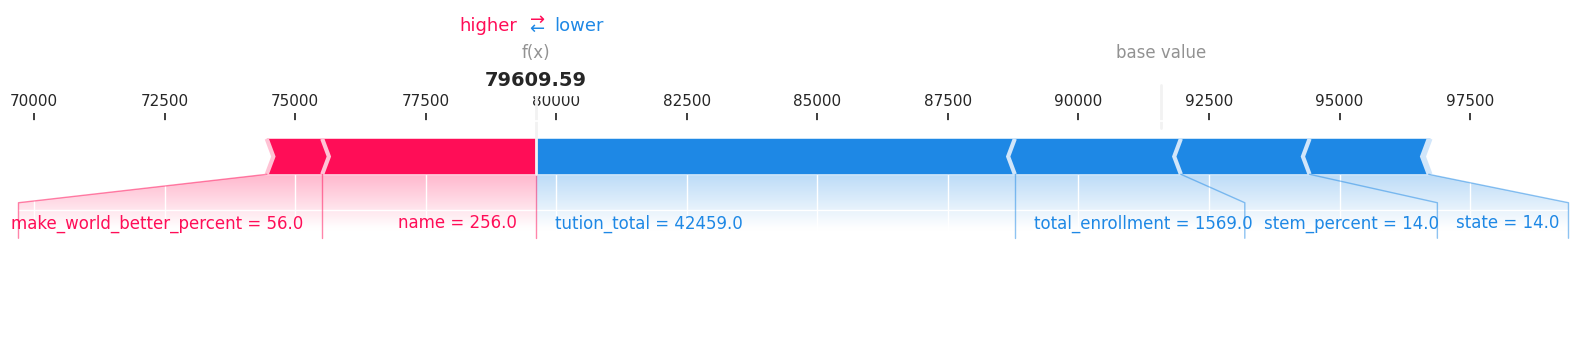

In [70]:
# using matplotlib to make a white background for clear visualization----
import matplotlib.pyplot as plt

# Visualize the first prediction's explanation with a white background
plt.figure(figsize=(10, 4))  # Adjust figure size as needed
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], xtrain.iloc[0,:], matplotlib=True, show=False)
plt.gca().set_facecolor('white')  # Set background color to white
plt.show()

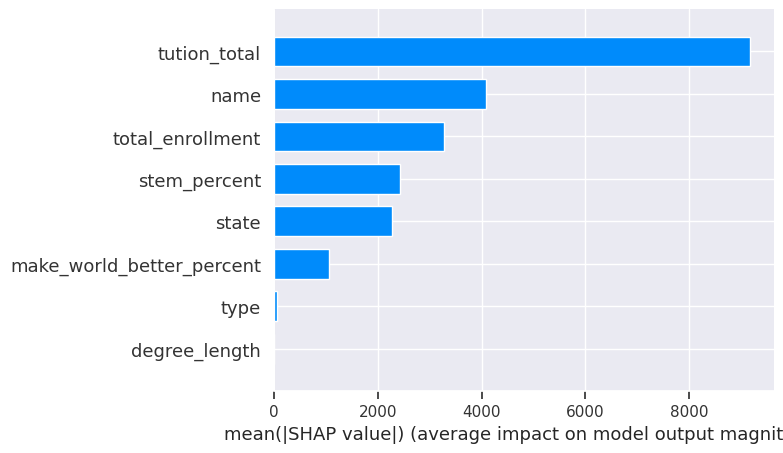

In [71]:
shap_values = shap.TreeExplainer(xgbr).shap_values(xtest_minmax)
shap.summary_plot(shap_values, xtrain, plot_type="bar")

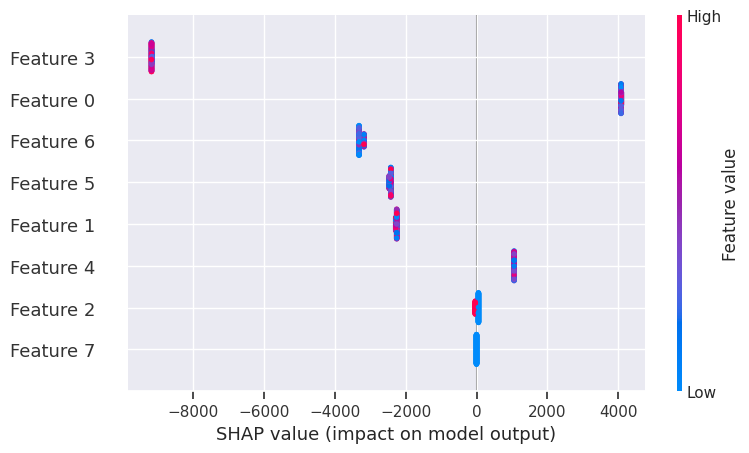

In [72]:
shap.summary_plot(shap_values, xtest_minmax)